<a href="https://colab.research.google.com/github/datasciapps/trifels2025/blob/master/binn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knowledge-enhanced biomarker discovery workshop

a.k.a. Embedding prior knowledge into multi-omics integration.

[**AI in Bioinformatics Spring School**](https://trifels2025.kl.dfki.de/)  
_Annweiler-am-Triefels, Rhineland-Palatinate, Germany, March 2025_

## Learning outcomes

1. Compare approaches for integrating biological knowledge into biomarker discovery
2. Design and critique deep learning architectures for multi-omics tasks
3. Get hands-on experience with 'BINN'/'VNN' frameworks and identify practical challenges

## Resources

1. _This_ Colab notebook ([link](https://colab.research.google.com/drive/1pqFEGiqWA0Ku6SovHSDUoLCE3uVKgGlm?usp=sharing))
2. Open-source software packages --- *see Table, below*
3. Cancer Genome Atlas data --- <https://www.cbioportal.org>
4. Workshop slides --- <https://datasciapps.github.io/trifels2025/slides.html>

There are a handful for tools for fitting biologically-informed neural networks in Python. Most are designed for single-omic inputs.

Package    | Reference     | Learning task | Modality | Input data type
-----------|------------|---------------|------------|------------
[BINN](https://infectionmedicineproteomics.github.io/BINN)       | Hartman et al ([2023](https://www.nature.com/articles/s41467-023-41146-4)) | supervised    | single-omic | proteomics
[VEGA](https://github.com/LucasESBS/vega/tree/main)       | Seninge et al ([2021](https://www.nature.com/articles/s41467-021-26017-0))   | unsupervised  | single-omic | transcriptomics
[GenNet](https://github.com/arnovanhilten/GenNet)     | van Hilten et al ([2021](https://www.nature.com/articles/s42003-021-02622-z)) | supervised    | single-omic | genomics
[GenNet-multi-omic](https://github.com/ArnovanHilten/GenNet-multi-omic) | van Hilten et al ([2024](https://www.nature.com/articles/s41540-024-00405-w)) | supervised | multi-omics | transcriptomics & epigenomics



# Practical task

In this worksheet, the goal is to compare and contrast different methods for multi-omics integration to predict survival of patients with cancer.
We consider the effect of embedding of prior knowledge on the model and its outputs.

## Download and wrangle omics data from the Cancer Genome Atlas (TCGA)

I've done this so you don't have to.
We download data from [cBioPortal](https://www.cbioportal.org/datasets).
The scripts below will bring it directly into the Colab working directory, so you don't have to worry about saving big files onto your laptop, or bringing the internet in Annweiler-am-Triefels to a stuttering halt.

This might take a minute or so:

In [34]:
study_id = "prad_tcga_pan_can_atlas_2018"                               # Prostate cancer cohort
!wget -nc https://cbioportal-datahub.s3.amazonaws.com/{study_id}.tar.gz # Download to Colab
!tar -xzf {study_id}.tar.gz                                             # Unzip archive
%ls {study_id}                                                          # Show files

File ‘prad_tcga_pan_can_atlas_2018.tar.gz’ already there; not retrieving.

case_lists/
data_armlevel_cna.txt
data_clinical_patient.txt
data_clinical_sample.txt
data_clinical_supp_hypoxia.txt
data_cna_hg19.seg
data_cna.txt
data_gene_panel_matrix.txt*
data_genetic_ancestry.txt
data_log2_cna.txt
data_methylation_hm27_hm450_merged.txt
data_mrna_seq_v2_rsem.txt
data_mrna_seq_v2_rsem_zscores_ref_all_samples.txt
data_mrna_seq_v2_rsem_zscores_ref_diploid_samples.txt
data_mrna_seq_v2_rsem_zscores_ref_normal_samples.txt
data_mutations.txt
data_resource_definition.txt
data_resource_patient.txt
data_rppa.txt
data_rppa_zscores.txt
data_sv.txt
data_timeline_sample_acquisition.txt
data_timeline_status.txt
data_timeline_treatment.txt
LICENSE
meta_armlevel_cna.txt
meta_clinical_patient.txt
meta_clinical_sample.txt
meta_cna_hg19_seg.txt
meta_cna.txt
meta_gene_panel_matrix.txt*
meta_genetic_ancestry.txt
meta_log2_cna.txt
meta_methylation_hm27_hm450_merged.txt
meta_mrna_seq_v2_rsem.txt
meta_mrna_seq_v2_rs

You can have a peek at some of the raw data in the folder using shell commands.

In [35]:
%cat {study_id}/README.md                                               # (Optional) browse the documentation

## Improving PanCancer Atlas Data: (transformation steps for the new data types being added)

### The Timeline/Treatment data:

**Data Source**
- GDAC Firehose: https://gdac.broadinstitute.org/
- File Used: `Merge_Clinical.Level_1.20160128` (clin.merged.txt) for each cancer type.

**Data Transformation** 
- The detailed transformation steps are listed in the Pull Request [here](https://github.com/cBioPortal/datahub/pull/1597)

### The Genetic Ancestry data:


**Data Source**
- GDAC Firehose: https://gdc.cancer.gov/about-data/publications/CCG-AIM-2020
- File Used: `Admixture_by_sample.txt` (Admix percent by sample) for each cancer type.


### The Methylation data:

**Data Source**
- GDAC Firehose: https://gdc.cancer.gov/node/977
- File Used: `jhu-usc.edu_PANCAN_HumanMethylation450.betaValue_whitelisted.tsv` (DNA methylation 450K only beta value data matrix) for each cancer type.

**Data Transformation** 
 - The detailed transformation steps are listed in the Pull Request [here](https://

In [36]:
!head -n6 {study_id}/data_mrna_seq_v2_rsem_zscores_ref_all_samples.txt  # (Optional) peek at the RNAseq data

Hugo_Symbol	Entrez_Gene_Id	TCGA-2A-A8VL-01	TCGA-2A-A8VO-01	TCGA-2A-A8VT-01	TCGA-2A-A8VV-01	TCGA-2A-A8VX-01	TCGA-2A-A8W1-01	TCGA-2A-A8W3-01	TCGA-2A-AAYF-01	TCGA-2A-AAYO-01	TCGA-2A-AAYU-01	TCGA-4L-AA1F-01	TCGA-CH-5737-01	TCGA-CH-5738-01	TCGA-CH-5739-01	TCGA-CH-5740-01	TCGA-CH-5741-01	TCGA-CH-5743-01	TCGA-CH-5744-01	TCGA-CH-5745-01	TCGA-CH-5746-01	TCGA-CH-5748-01	TCGA-CH-5750-01	TCGA-CH-5751-01	TCGA-CH-5752-01	TCGA-CH-5753-01	TCGA-CH-5754-01	TCGA-CH-5761-01	TCGA-CH-5762-01	TCGA-CH-5763-01	TCGA-CH-5764-01	TCGA-CH-5765-01	TCGA-CH-5766-01	TCGA-CH-5767-01	TCGA-CH-5768-01	TCGA-CH-5769-01	TCGA-CH-5771-01	TCGA-CH-5772-01	TCGA-CH-5788-01	TCGA-CH-5789-01	TCGA-CH-5790-01	TCGA-CH-5791-01	TCGA-CH-5792-01	TCGA-CH-5794-01	TCGA-EJ-5494-01	TCGA-EJ-5495-01	TCGA-EJ-5496-01	TCGA-EJ-5497-01	TCGA-EJ-5498-01	TCGA-EJ-5499-01	TCGA-EJ-5501-01	TCGA-EJ-5502-01	TCGA-EJ-5503-01	TCGA-EJ-5504-01	TCGA-EJ-5505-01	TCGA-EJ-5506-01	TCGA-EJ-5507-01	TCGA-EJ-5508-01	TCGA-EJ-5509-01	TCGA-EJ-5510-01	TCGA-EJ-5511-01	TCGA-EJ-5512-

In [37]:
!head -n6 {study_id}/data_clinical_patient.txt                          # (Optional) see clinical var definitions

#Patient Identifier	Subtype	TCGA PanCanAtlas Cancer Type Acronym	Other Patient ID	Diagnosis Age	Sex	Neoplasm Disease Stage American Joint Committee on Cancer Code	American Joint Committee on Cancer Publication Version Type	Last Communication Contact from Initial Pathologic Diagnosis Date	Birth from Initial Pathologic Diagnosis Date	Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value	Ethnicity Category	Form completion date	Neoadjuvant Therapy Type Administered Prior To Resection Text	ICD-10 Classification	International Classification of Diseases for Oncology, Third Edition ICD-O-3 Histology Code	International Classification of Diseases for Oncology, Third Edition ICD-O-3 Site Code	Informed consent verified	New Neoplasm Event Post Initial Therapy Indicator	American Joint Committee on Cancer Metastasis Stage Code	Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code	American Joint Committee on Cancer Tumor Stage Code	Person Neoplasm Cancer Status	Pri

The data from TCGA has some quirks, requiring some wrangling to get it into a 'tidy' format where rows represent patients or samples and columns represent features. Some helper functions will get it into Pandas DataFrames.

In [38]:
import pandas as pd

def read_clinical_data(study_id):
  clinical = pd.read_table(study_id + '/data_clinical_patient.txt', skiprows=4)
  status_cols = [col for col in clinical.columns if col.endswith('S_STATUS')]
  # Split columns with values like "0:ALIVE OR DEAD TUMOR FREE"
  # into binary 0/1 indicators, while keeping the labels for clarity
  for col in status_cols:
    clinical[[col, col + '_LABEL']] = clinical[col].str.split(':', n=1, expand=True)
    clinical[col] = clinical[col].astype('Int64')
  clinical['Patient_ID'] = clinical['PATIENT_ID'] + '-01' # for linkage
  return clinical.set_index('Patient_ID')

dtypes = {'Hugo_Symbol': 'string', 'Entrez_Gene_Id': 'string'}

def read_cna_data(study_id):
  return pd.read_table(study_id + '/data_cna.txt', dtype=dtypes)

def read_expression_data(study_id):
  return pd.read_table(
      study_id + '/data_mrna_seq_v2_rsem_zscores_ref_all_samples.txt',
      dtype = dtypes)

def transpose_omic_data(df):
  df_t = df.set_index(['Hugo_Symbol', 'Entrez_Gene_Id']).T
  df_t.index.name = 'Patient_ID'
  return df_t

Let's import the data.

In [39]:
# Get the clinical data, including patient outcomes
clinical = read_clinical_data(study_id)

# Get the transcriptomics (RNAseq) data
mrna = read_expression_data(study_id)
mrna = transpose_omic_data(mrna)

# Get the Copy Number Alterations data
cna = read_cna_data(study_id)
cna = transpose_omic_data(cna)

Check for missing values.

In [40]:
def preprocess_data(df):
  # Drop columns with missingness
  df = df.dropna(axis=1)
  return df

mrna = preprocess_data(mrna)
mrna

Hugo_Symbol          <NA>            UBE2Q2P2 HMGB1P1    <NA>          \
Entrez_Gene_Id  100130426 100133144 100134869   10357   10431  155060   
Patient_ID                                                              
TCGA-2A-A8VL-01   -3.9250    0.9961    0.2808 -0.6698  1.5187  0.4726   
TCGA-2A-A8VO-01   -3.9250    0.8972   -0.0291 -1.5009 -0.0310  0.7544   
TCGA-2A-A8VT-01   -3.9250    2.2028    2.0529 -0.1843 -1.4942  1.7714   
TCGA-2A-A8VV-01   -3.9250    1.0604    0.2002  0.2431  0.1970  0.0339   
TCGA-2A-A8VX-01   -3.9250   -1.4829   -0.6803 -0.1020 -0.1675  0.5177   
...                   ...       ...       ...     ...     ...     ...   
TCGA-QU-A6IL-01   -3.9250    0.7901   -2.1185 -0.7843  0.2891  1.6776   
TCGA-QU-A6IM-01   -3.9250    1.9255   -4.0599 -2.5256  0.5977  0.9925   
TCGA-QU-A6IN-01   -0.2381   -2.8149   -0.0429  0.0777  1.4064  0.6638   
TCGA-QU-A6IO-01   -3.9250   -2.8149   -1.7740 -1.6297  0.8572  1.3956   
TCGA-QU-A6IP-01   -3.9250    0.4277    0.0074  0.8809 -1.2377 -0.1107   

Hugo_Symbol     RNU12-2P   EZHIP  EFCAB8 SRP14P1  ...  ZWILCH   ZWINT    ZXDA  \
Entrez_Gene_Id     26823  340602  388795  390284  ...   55055   11130    7789   
Patient_ID                                        ...                           
TCGA-2A-A8VL-01  -1.8207 -0.7257 -0.7396  0.5098  ... -0.3388 -0.9943 -0.4822   
TCGA-2A-A8VO-01  -1.8207 -0.4969  2.4261 -0.0926  ... -0.5077  0.4074 -0.8093   
TCGA-2A-A8VT-01   0.6468 -0.9740 -0.4385 -1.5329  ... -0.5012 -0.6473  1.6314   
TCGA-2A-A8VV-01  -1.8207  1.2032 -0.8054  0.0868  ... -0.0608 -0.3514 -0.6495   
TCGA-2A-A8VX-01  -1.8207 -1.7339 -0.7559 -0.7974  ...  1.5470  0.8446 -2.1341   
...                  ...     ...     ...     ...  ...     ...     ...     ...   
TCGA-QU-A6IL-01  -1.5181 -1.7339  2.9465 -2.2980  ... -0.7664 -0.2704 -3.0758   
TCGA-QU-A6IM-01   3.3658  2.2315 -1.6605  0.0510  ... -1.4491 -0.5470 -0.5279   
TCGA-QU-A6IN-01   1.1729 -1.7339  0.2855 -2.5453  ... -0.4354 -1.0692 -1.1372   
TCGA-QU-A6IO-01  -1.5181 -1.7339  0.5266 -2.0180  ... -1.0078 -0.8273 -1.0757   
TCGA-QU-A6IP-01  -1.5181  0.2884 -1.6605  1.3419  ... -0.1583  0.2351  0.3339   

Hugo_Symbol        ZXDB    ZXDC  ZYG11A  ZYG11B     ZYX   ZZEF1    ZZZ3  
Entrez_Gene_Id   158586   79364  440590   79699    7791   23140   26009  
Patient_ID                                                               
TCGA-2A-A8VL-01 -1.4010 -0.0668 -0.5152 -0.9247 -0.1804  0.7221 -1.7267  
TCGA-2A-A8VO-01 -0.3129 -1.0530  1.1311 -0.5927  0.1804 -1.0429 -0.8300  
TCGA-2A-A8VT-01  1.3083  2.2305 -0.3449  1.1050 -1.0783  1.7868  2.0489  
TCGA-2A-A8VV-01  0.0283 -0.4782  0.0658 -1.3796  0.4464 -0.4486  1.0313  
TCGA-2A-A8VX-01 -0.5554 -0.5875  1.1058 -0.8375 -0.2113 -1.1054 -0.2218  
...                 ...     ...     ...     ...     ...     ...     ...  
TCGA-QU-A6IL-01 -0.1841 -0.3960 -0.0478 -0.8779 -0.3305 -0.7006  0.9492  
TCGA-QU-A6IM-01 -2.4639 -2.4755 -0.8118 -0.9032  0.5063  0.0355 -0.9174  
TCGA-QU-A6IN-01 -0.3544  1.1911 -0.0200 -0.8794 -0.9727  0.1205  0.6201  
TCGA-QU-A6IO-01 -1.2589  0.0773 -0.2031 -1.0870 -0.0718 -0.6685 -1.7188  
TCGA-QU-A6IP-01  1.2292  0.8662 -1.0269  1.5055 -0.0918  0.6088  0.8540  

[493 rows x 19088 columns]

In [41]:
import numpy as np

def filter_most_varying_genes(df, threshold=0.8):
  std_devs = df.std()
  cutoff = np.percentile(std_devs, threshold * 100)
  selected_genes = std_devs[std_devs >= cutoff].index
  return selected_genes

cna = preprocess_data(cna)
assert not mrna.std().isnull().any()
assert not cna.std().isnull().any()

We can throw away various features we are not interested in, for example genes that hardly vary among the cohort.

In [42]:
mrna_most_varying_genes = filter_most_varying_genes(mrna)
cna_most_varying_genes = filter_most_varying_genes(cna)

mrna = mrna[mrna_most_varying_genes]
cna = cna[cna_most_varying_genes]

## Standard ML multi-omics integration



To integrate the data, we only include patients for whom can link all three data sources.

In [61]:
mrna2 = mrna.copy()
mrna2.columns = mrna2.columns.droplevel(0)
merged_data = clinical[['DFS_STATUS']].join(mrna2, how = 'inner')
merged_data

,DFS_STATUS,100133144,100134869,26823,340602,388795,390284,553137,645851,728788,...,741,22917,11055,124626,84891,284312,221584,201516,342933,221302
Patient_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-2A-A8VL-01,<NA>,0.9961,0.2808,-1.8207,-0.7257,-0.7396,0.5098,0.3660,-0.0490,1.4997,...,0.4033,0.7695,-2.0636,-0.5916,0.6087,1.2043,-0.8721,-0.7535,1.6291,0.8346
TCGA-2A-A8VO-01,<NA>,0.8972,-0.0291,-1.8207,-0.4969,2.4261,-0.0926,-1.6300,0.1810,-1.6614,...,0.1550,0.6578,-2.0636,-1.7064,-1.8434,0.6465,-0.4179,-1.3665,1.1989,0.2710
TCGA-2A-A8VT-01,<NA>,2.2028,2.0529,0.6468,-0.9740,-0.4385,-1.5329,-1.6300,1.5115,0.3686,...,-5.5495,-1.2087,-0.8136,-1.7064,0.0656,0.5579,0.1579,-0.2694,0.1283,-0.2076
TCGA-2A-A8VV-01,<NA>,1.0604,0.2002,-1.8207,1.2032,-0.8054,0.0868,3.2781,-0.1698,-1.6614,...,0.3671,0.7487,-2.0636,-1.7064,-0.5076,1.0897,-0.0289,-1.3665,0.1677,1.1094
TCGA-2A-A8VX-01,<NA>,-1.4829,-0.6803,-1.8207,-1.7339,-0.7559,-0.7974,-1.6300,-0.4578,-0.0971,...,0.2351,1.8114,-2.0636,-1.7064,-1.8434,1.0994,-1.3014,-1.3665,2.7819,0.5599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-ZG-A9M4-01,<NA>,0.9094,0.8918,-1.8207,-0.8704,3.5309,-1.0770,-1.6300,0.3983,2.0696,...,0.4618,-1.7671,-2.0636,0.5075,-1.8434,0.1734,-1.9607,-0.4551,-0.9547,0.8531
TCGA-ZG-A9MC-01,<NA>,0.3699,0.0658,-1.8207,-0.0501,-0.7608,-0.8089,-1.6300,0.1225,-0.1046,...,-0.2889,-2.0561,0.7061,0.1554,-1.8434,-0.6349,-0.6936,0.2560,-0.7610,-0.9568
TCGA-ZG-A9N3-01,<NA>,-0.5692,-0.9683,-1.8207,0.9768,-1.6605,-1.8703,-1.6300,-0.5834,-1.6614,...,0.3156,0.3564,-2.0636,-1.7064,-1.8434,-0.0991,-0.5565,-1.3665,0.3152,-0.8459


In [63]:
merged_data = merged_data.dropna()
merged_data['DFS_STATUS'].value_counts(dropna=False)

,count
DFS_STATUS,
0,303
1,30


Pick a target.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target
X = merged_data.drop('DFS_STATUS', axis=1)
y = merged_data['DFS_STATUS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9104477611940298
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        61
         1.0       0.00      0.00      0.00         6

    accuracy                           0.91        67
   macro avg       0.46      0.50      0.48        67
weighted avg       0.83      0.91      0.87        67



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


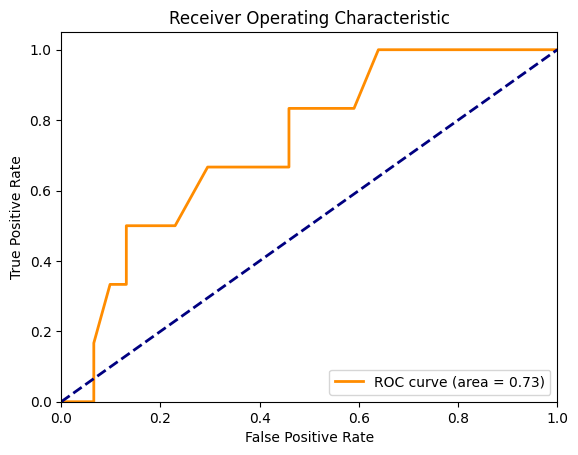

In [68]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [67]:
# Get feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf_classifier.feature_importances_})

# Sort features by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 most important features
print("Top 10 most important features:")
print(feature_importances.head(10))

Top 10 most important features:
        feature  importance
2528       4975    0.008496
1157     388581    0.008359
3111     283514    0.006567
1444     144423    0.006115
1009       1749    0.005480
3439       7036    0.005331
1808       3741    0.005252
3055      11231    0.005150
565      389813    0.005030
1     100134869    0.004925


## Biologically-informed neural networks

A biologically-informed deep learning framework requires three data sources:
1. a dataset of omics from patients (optionally with phenotypes targets, e.g. disease types, or event times),  
i.e. $X$ (and $y$) as for any ordinary ML or statistics task
2. a mapping from observed features to biological concepts, e.g. genes
3. a pathway database or gene regulatory network

In single-omics analyses, the mapping might be natively built into the input dataset, since gene expression data is already labelled according to genes.
However, multi-omics analyses or SNPs will require a mapping from the respective entity, e.g. from the mutation to the corresponding gene.

Some BINN software packages are bundled with a couple of common pathway databases, e.g. Reactome. You can also supply your own topology, if those provided are not enough, if you want to try advanced fusion strategies or if you want to integrate non-omic-type data (e.g. patient demographics) into your model.

## Dependencies

All of the packages above are available on GitHub; you can also install the first two packages from PyPI as follows:

```bash
pip install binn
pip install scvega
```

There are one or two bugs in the visualization module of v0.1.0 of the `binn` package so we recommended installing v0.1.1 or later.

In [ ]:
%pip install binn==0.1.1 #scvega

### Exercise

1. Fit a [`binn` model](https://infectionmedicineproteomics.github.io/BINN/) to the TCGA data. What is a reasonable target?
2. What assumptions are being made here?
3. What would be a reasonable baseline
    1. a biologically-informed, non-deep-learning model
    1. an uninformed, deep learning model
    1. an uninformed, non-deep-learning model
3. How might we adapt the `pathways` to integrate
    1. clinical data?
    1. multiple omics?


In [ ]:
from binn import BINN

input_data = # ...

binn = BINN(
    data_matrix=input_data,
    network_source="reactome",
    input_source="uniprot",
    n_layers=4,
    dropout=0.2
)

# Contact

![David Selby](https://dsa.dfki.de/author/david-antony-selby/avatar_hu01a7ec985a1cb8a44b491be532ed5d21_24285_270x270_fill_q75_lanczos_center.jpg)

> **David Selby**  
Data Science and its Applications  
German Research Centre for Artificial Intelligence (DFKI)  
david.selby@dfki.de  
https://dsa.dfki.de  